In [117]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlalchemy
from scipy.stats import sem
from sqlalchemy import create_engine, and_
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect
from sqlalchemy import Column, Integer, String, Float 
from sqlalchemy import func

In [118]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [119]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [120]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [121]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [122]:
measurement= Base.classes.measurement
station = Base.classes.station 

In [123]:
session = Session(bind=engine)

In [152]:
date = session.query(measurement.prcp, measurement.date).filter(measurement.date > '2016-08-01').all()
date = pd.DataFrame(date)
date.set_index(date['date'], inplace=True)

date=date.drop('date', axis=1)
date.head()

,prcp
date,
2016-08-02,0.05
2016-08-03,0.00
2016-08-04,0.04
2016-08-05,0.01
2016-08-06,0.00


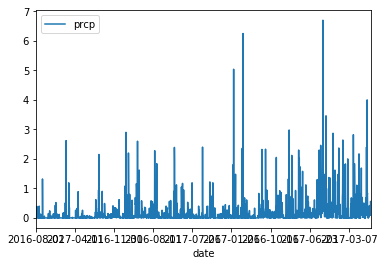

In [125]:
date.plot()
plt.show()

In [210]:
results = session.query(func.count(measurement.station), measurement.tobs).filter(measurement.date > '2016-08-01')\
.group_by(measurement.tobs).all()
results = pd.DataFrame(results, columns=['Frequency', 'temp'])
results.set_index(results['temp'], inplace=True)
results=results.drop('temp', axis=1)
results.head()


,Frequency
temp,
58.0,1
59.0,3
60.0,6
61.0,4
62.0,13


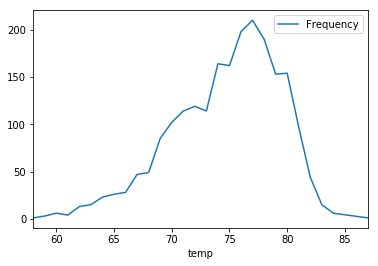

In [211]:
results.plot()
plt.show()

In [216]:

plt.hist(results, results['Frequency'],alpha=0.5, bins=12)
plt.show()

TypeError: hist() got multiple values for argument 'bins'

In [ ]:

plt.hist(results['temp'], results['Frequency'],alpha=0.5, bins=12)
plt.show()

In [98]:
def calc_temps(start, end):
    session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).filter(measurement.date >= start).filter(measurement.date <= end).all()

calc_temps('2017-04-05', '2017-04-09')  


In [99]:
print(calc_temps('2017-04-05', '2017-04-09'))

None
